## Week 12 Assignment - W200 Python Fundamentals for Data Science, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository in your SUBMISSIONS/week_12 folder by 11:59PM PST the night before class.

This homework assignment is Week 12 which corresponds to the Unit #11 async. If you turn-in anything on ISVC please do so under the Week 12 Assignment category. (Apologies for the confusion)

## Objectives

- Explore and get insights from a real dataset using pandas
- Practice the use of pandas for: exploratory analysis, information gathering and discovery
- Use matplotlib for plotting charts from the data

## Data files

In this assignment you will apply what you are learning to answer questions about campaign contributions in the Democratic presidential primary race. We will use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You will need to download and save the csv in the same folder as this notebook. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

** REMEMBER -- DO NOT PUT THIS DATA IN YOUR GITHUB REPO ! **

Documentation for this data file can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it contains errors and other pecularities to work through
- The data is ~218mb which will take some time to load (and probably won't load in google sheets or Excel)
- If you make assumptions please annotate them in your answer
- While we've left one code/markdown cell for you after each question as a placeholder, some of your answers will require multiple cells to fully respond
- Double click the markdown cells where it says YOUR ANSWER HERE to enter your written answers; if you need more cells for your written answers, please make them markdown cells (rather than code cells)

## Setup

First, run the two cells below. 

The first cell will load in the data to a pandas dataframe named 'contrib'. Note we define a custom date parser to speed up import (we could have Python guess the date format, but this can make the load a lot slower).  

The second cell subsets the data to look at the primary period.  Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.  We will analyze through May 2016.

In [1]:
# import the data
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Create date parser to pass to read_csv
import datetime
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

contrib = pd.read_csv('./P00000001-CA.csv', index_col=False, parse_dates = ['contb_receipt_dt'], date_parser=d)

# Note - for now, it is okay to ignore the warning about mixed types.  

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Subset data to primary period 
print(contrib.shape)

contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(1125659, 18)
(654502, 18)


## 1. Data Exploration

**1a.** First, let's take a preliminary look at our data:
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this dataset (linked above). Do you have all of the columns you expect to have?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the "election_tp" variable contain?

In [3]:
print("Shape:", contrib.shape)
print("Columns:", contrib.columns)

Shape: (654502, 18)
Columns: Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'tran_id', 'election_tp'],
      dtype='object')


1a 
- The shape tells me that there are 18 columns/variables and 654,502 rows/observations
- All the columns in the documentation are included in the dataframe
- The election_tp variable contains the election type (primary, general, other, ...) and the election year for which the contribution was made

**1b.** Print out the first 5 rows from the dataset to manually look through some of your data.

In [4]:
contrib.head(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00575795,P00003392,"Clinton, Hillary Rodham","AULL, ANNE",LARKSPUR,CA,"949,391,913.00",NaN,RETIRED,50.00,2016-04-26,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4768722,P2016
1,C00575795,P00003392,"Clinton, Hillary Rodham","CARROLL, MARYJEAN",CAMBRIA,CA,"934,284,638.00",NaN,RETIRED,200.00,2016-04-20,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4747242,P2016
2,C00575795,P00003392,"Clinton, Hillary Rodham","GANDARA, DESIREE",FONTANA,CA,"923,371,507.00",NaN,RETIRED,5.00,2016-04-02,NaN,X,* HILLARY VICTORY FUND,SA18,1091718,C4666603,P2016
3,C00577130,P60007168,"Sanders, Bernard","LEE, ALAN",CAMARILLO,CA,"930,111,214.00",AT&T GOVERNMENT SOLUTIONS,SOFTWARE ENGINEER,40.00,2016-03-04,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKWA097,P2016
4,C00577130,P60007168,"Sanders, Bernard","LEONELLI, ODETTE",REDONDO BEACH,CA,"902,784,310.00",VERICOR ENTERPRISES INC.,PHARMACIST,35.00,2016-03-05,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1077404,VPF7BKX3MB3,P2016


**1c.** When working with a new dataset, it is important to explore and sanity check your variables. Pick **three** variables from the dataset above and run some quick sanity checks. For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use markdown cells to explain if your sanity checks "pass" your scrutiny or if you have concerns about the integrity of your data. 

**Contribution receipt amount**

In [5]:
print(contrib.contb_receipt_amt.describe())
print()
print("Negative contributions amounts:", sum(contrib.contb_receipt_amt < 0))

count   654,502.00
mean        126.50
std         459.17
min     -10,000.00
25%          15.00
50%          27.00
75%          75.00
max      10,800.00
Name: contb_receipt_amt, dtype: float64

Negative contributions amounts: 6977


In [6]:
print(contrib.form_tp.value_counts())
print()
contrib.groupby('form_tp').describe()

SA17A    629741
SA18      20240
SB28A      4521
Name: form_tp, dtype: int64



contb_receipt_amt                                                   \
                    count    mean    std        min     25%     50%    75%   
form_tp                                                                      
SA17A          629,741.00  129.42 450.81  -5,400.00   15.00   27.00  75.00   
SA18            20,240.00  195.86 406.65  -2,700.00   41.91  100.00 200.00   
SB28A            4,521.00 -590.88 968.06 -10,000.00 -500.00 -100.00 -38.00   

                    file_num                                                   \
              max      count         mean       std          min          25%   
form_tp                                                                         
SA17A   10,800.00 629,741.00 1,077,059.34 15,311.39 1,003,942.00 1,077,404.00   
SA18     2,700.00  20,240.00 1,088,499.57  7,578.82 1,004,025.00 1,081,062.00   
SB28A       -0.44   4,521.00 1,079,793.24 13,922.21 1,014,957.00 1,077,404.00   

                                                
                 50%          75%          max  
form_tp                                         
SA17A   1,077,916.00 1,081,062.00 1,108,056.00  
SA18    1,091,718.00 1,091,720.00 1,112,134.00  
SB28A   1,079,445.00 1,091,718.00 1,096,260.00

**Election type**

In [7]:
contrib.election_tp.describe()

count     654364
unique         3
top        P2016
freq      649293
Name: election_tp, dtype: object

In [8]:
contrib.election_tp.value_counts()

P2016    649293
G2016      5064
P2020         7
Name: election_tp, dtype: int64

In [9]:
print('NAs number', sum(pd.isna(contrib.election_tp)))
print('NAs number', (sum(pd.isna(contrib.election_tp)) / len(contrib)) * 100)

NAs number 138
NAs number 0.021084733125338043


**Contribution receipt date**

In [10]:
contrib.contb_receipt_dt.describe()

count                  654502
unique                    518
top       2016-02-29 00:00:00
freq                    11735
first     2013-11-05 00:00:00
last      2016-05-31 00:00:00
Name: contb_receipt_dt, dtype: object

In [11]:
contrib.contb_receipt_dt[contrib.contb_receipt_dt < "2016"].describe()

count                  140783
unique                    366
top       2015-12-31 00:00:00
freq                     4595
first     2013-11-05 00:00:00
last      2015-12-31 00:00:00
Name: contb_receipt_dt, dtype: object

1c
- A sanity check on **contribution receipt amount** showed that there was a significant number of negative donations (6,977). I initially suspected that negative donations meant refunds to individuals so I grouped the data by 'form type' to check if the negative observations belonged to line 28A (refunds to individuals) but there are negative values in all the forms. Therefore, unless there is some accounting rule that I am not aware of, I am concerned about the integrity of this variable.
- A sanity check on **election type** showed two suspicious results. First, that there were 7 donations for the 2020 primaries and, second, that there are 138 donations with no type. Even though these could be errors in the data, and it is important to take them into account in further analyses, they are very few and probably not a cause for concern.
- Finally, I didn't find anything to worry about in **receipt date**. There are no missing values and the maximum and minimum dates make sense.

## 2. Exploring Campaign Contributions

Let's investigate the donations to the candidates.

**2a.** 
Create a table that shows the total number of donations to each candidate. Hint: use "groupby" as shown in async unit 11.07.

When presenting data in a table, it is best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to get insights out of your tables. Use "sort_values" to sort the data so that candidates with the largest number of donations appear on top. From now on, all tables you present in this assignment (and course) should be sorted.

What candidate recieved the largest number of contributions (variable 'contb_receipt_amt')?

In [12]:
contrib_count_cand = contrib.groupby('cand_nm').cand_nm.count().sort_values(ascending=False)
contrib_count_cand

cand_nm
Sanders, Bernard             371795
Clinton, Hillary Rodham      163509
Cruz, Rafael Edward 'Ted'     57136
Carson, Benjamin S.           27342
Rubio, Marco                  14089
Fiorina, Carly                 4696
Paul, Rand                     4256
Bush, Jeb                      3114
Kasich, John R.                2988
Trump, Donald J.               2255
Walker, Scott                   713
Huckabee, Mike                  531
O'Malley, Martin Joseph         397
Lessig, Lawrence                372
Graham, Lindsey O.              342
Christie, Christopher J.        333
Stein, Jill                     197
Perry, James R. (Rick)          116
Webb, James Henry Jr.           106
Santorum, Richard J.             84
Johnson, Gary                    77
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: cand_nm, dtype: int64

- 2a Bernard Sanders

**2b.** Now, create a table that shows the total **value** of donations to each candidate. What candidate raised the most money in California?

In [13]:
contrib_amt_cand = contrib.groupby('cand_nm').contb_receipt_amt.apply(sum).sort_values(ascending=False)
contrib_amt_cand

cand_nm
Clinton, Hillary Rodham     39,368,777.01
Sanders, Bernard            18,773,871.31
Cruz, Rafael Edward 'Ted'    6,286,460.34
Rubio, Marco                 4,846,483.72
Bush, Jeb                    3,325,536.83
Carson, Benjamin S.          2,952,109.00
Kasich, John R.              1,553,823.54
Fiorina, Carly               1,468,489.42
Trump, Donald J.               893,356.89
Paul, Rand                     797,624.29
Walker, Scott                  495,006.90
Christie, Christopher J.       456,066.00
Graham, Lindsey O.             408,595.00
O'Malley, Martin Joseph        297,834.26
Huckabee, Mike                 230,890.60
Perry, James R. (Rick)         208,400.00
Lessig, Lawrence               186,144.50
Webb, James Henry Jr.           76,568.16
Johnson, Gary                   41,187.60
Santorum, Richard J.            36,304.88
Pataki, George E.               30,450.00
Stein, Jill                     27,918.00
Jindal, Bobby                   23,231.26
Gilmore, James S III      

In [14]:
contrib[contrib.contbr_st == 'CA'].groupby('cand_nm').contb_receipt_amt.apply(sum).sort_values(ascending=False).head(1)

cand_nm
Clinton, Hillary Rodham   39,368,777.01
Name: contb_receipt_amt, dtype: float64

- 2b Hillary Rodham Clinton raised the most money

**2c.** Combining your tables
- What is the "type" of the two tables you printed above? Show if they are Series, or DataFrames.
- Convert any Series to pandas DataFrames.
- Update the variable (column) names to accurately describe what is shown
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table. Use the "join" function.

In [15]:
print("contrib_num_cand:", type(contrib_count_cand))
print("contrib_amt_cand:", type(contrib_amt_cand))

contrib_num_cand: <class 'pandas.core.series.Series'>
contrib_amt_cand: <class 'pandas.core.series.Series'>


In [16]:
contrib_count_cand = pd.DataFrame(contrib_count_cand)
contrib_amt_cand = pd.DataFrame(contrib_amt_cand)
contrib_count_cand.columns = ['contrib_count']
contrib_amt_cand.columns = ['contrib_amt']
print("contrib_num_cand:", type(contrib_count_cand), "Columns:", contrib_count_cand.columns)
print("contrib_amt_cand:", type(contrib_amt_cand), "Columns:", contrib_amt_cand.columns)

contrib_num_cand: <class 'pandas.core.frame.DataFrame'> Columns: Index(['contrib_count'], dtype='object')
contrib_amt_cand: <class 'pandas.core.frame.DataFrame'> Columns: Index(['contrib_amt'], dtype='object')


In [17]:
contrib_cand = contrib_count_cand.join(contrib_amt_cand, how='outer')
contrib_cand.head()

,contrib_count,contrib_amt
cand_nm,,
"Bush, Jeb",3114,"3,325,536.83"
"Carson, Benjamin S.",27342,"2,952,109.00"
"Christie, Christopher J.",333,"456,066.00"
"Clinton, Hillary Rodham",163509,"39,368,777.01"
"Cruz, Rafael Edward 'Ted'",57136,"6,286,460.34"


**2d.** Calculate and add a new variable to your table from **2c** that shows the average $ per donation.

In [19]:
contrib_cand['doll_per_donation'] = contrib_cand.contrib_amt / contrib_cand.contrib_count
contrib_cand.sort_values('doll_per_donation', ascending=False)

,contrib_count,contrib_amt,doll_per_donation
cand_nm,,,
"Gilmore, James S III",3,"8,100.00","2,700.00"
"Perry, James R. (Rick)",116,"208,400.00","1,796.55"
"Pataki, George E.",20,"30,450.00","1,522.50"
"Christie, Christopher J.",333,"456,066.00","1,369.57"
"Graham, Lindsey O.",342,"408,595.00","1,194.72"
"Bush, Jeb",3114,"3,325,536.83","1,067.93"
"O'Malley, Martin Joseph",397,"297,834.26",750.21
"Jindal, Bobby",31,"23,231.26",749.40
"Webb, James Henry Jr.",106,"76,568.16",722.34


**2e.** There are several interesting conclusions you can draw from the table you have created. Please comment on the results of your data analysis in a short paragraph. What have you learned about campaign contributions in California?

- 2e I have learned that both the amount and the number of contributions can vary greatly, for example, from only 3 contributions to 371,795. Also that the two top democrat candidates (Clinton and Sanders) have a desproportionately large share of the total number of donations but also of the amount contributed, despite their relatively low dollars per contribution. On this point, it was surprising to see that the candidate with the lowest dollars per contribution (Sanders) got the second highest amount of dollars in contributions, which hints at other socioeconomic characteristics of his donors that would be very interesting to explore. Finally, I learned that high levels of dollars per donation seem to be more concentrated in candidates with fewer contributions.

## 3. Exploring Donor Occupation

Above in part 2, we saw that some simple data analysis can give us insights into the campaign of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the "contbr_occupation" variable.

**3a.** Subset your data to create a data frame with only donations for Hillary Clinton. Then use value_counts() and head() to display the top 5 occupations (contbr_occupation) for her donors. Note: we are just interested in the count of donations, not the value of those donations.

In [21]:
contrib[contrib.cand_nm.str.contains("Clinton")].contbr_occupation.value_counts().head(5)

RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contbr_occupation, dtype: int64

In [22]:
occup_nas = sum(contrib.contbr_occupation.isna())
perc_ret = (contrib[contrib.contbr_occupation == "RETIRED"].shape[0] /\
            (contrib.shape[0] - occup_nas)) * 100
print("Retired as percentage of total:", perc_ret)

Retired as percentage of total: 14.921886069477045


**3b.** Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.  Specifically, write a function called get_donors() that takes a DataFrame as input, and outputs a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [24]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    return df.contbr_occupation.value_counts().head(5)

**3c.** Now try running your function on subsets of the dataframe corresponding to three candidates:
    1. Hillary Clinton
    2. Bernie Sanders
    3. Donald Trump

In [25]:
get_donors(contrib[contrib.cand_nm.str.contains('Clinton')])

RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
Name: contbr_occupation, dtype: int64

In [26]:
get_donors(contrib[contrib.cand_nm.str.contains('Sanders')])

NOT EMPLOYED         96371
RETIRED              15048
TEACHER              10167
SOFTWARE ENGINEER     7861
ENGINEER              7094
Name: contbr_occupation, dtype: int64

In [27]:
get_donors(contrib[contrib.cand_nm.str.contains('Trump')])

RETIRED                  849
INFORMATION REQUESTED     70
CEO                       57
OWNER                     51
PRESIDENT                 35
Name: contbr_occupation, dtype: int64

**3d.** Finally, use a groupby to divide the entire dataset by candidate.  Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.  Look at your output and marvel at what Pandas can do in just one line!

In [28]:
contrib.groupby('cand_nm').apply(get_donors)

cand_nm                                                          
Bush, Jeb                  RETIRED                                     996
                           HOMEMAKER                                   180
                           ATTORNEY                                     92
                           Q.A.                                         89
                           PRESIDENT                                    84
Carson, Benjamin S.        RETIRED                                   13692
                           INFORMATION REQUESTED PER BEST EFFORTS     1614
                           HOMEMAKER                                  1049
                           PHYSICIAN                                   329
                           R.N.                                        234
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your findings in a short paragraph.

- 3e It is surprising to find that retired are by far the largest group of donors (about 15% of total, and the main contributor in all but one of the candidates) which is likely to give them a desproportionate influence in who is chosen in the primaries. It also tells a lot about the profile of Trump and Sander that their contributors are so radically different, since the former is highly supported by CEOs, owners and presidents, while the latter is supported by teachers and engineers. I also found surprising that Carson had a high support from physicians. Even though they have a similar background as Carson, I assumed that the political inclinations of physicians would be mostly on the democrat's side (of course, given my close to null knowledge of American politics). Finally, the large amount of missing data in the form of "Information requested" type of responses obscures these results, since these missing values could change the picture of contributor's occupation significantly.

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. Do you have any new insights into the results you got in section 2, now that you see the top occupations for each candidate?

- 3f The dollars per contribution results in section 2 could be explained in part by the occupation of contributors. For example, excluding retireds, Sander's (with the lowest dollars_per_donation, of 50) contributors are mainly employess, while Trump's (with a DPD of 396) are mainly executives or owners. This could also help explain the number of contributors in section 2 since candidates whose contributors belong to less common occupations (such as Trump, Sartorum, or Christie) are not in the top of the list of number of contributions.


## 4. Plotting Data

There is an important element that we have not yet explored in this dataset - time.

**4a.** Please create a single line chart with the following elements:
- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

Text(0.5,0,'Date')

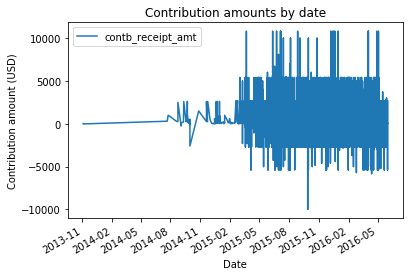

In [29]:
contrib.plot(x='contb_receipt_dt', y='contb_receipt_amt', kind='line')
plt.title('Contribution amounts by date')
plt.ylabel('Contribution amount (USD)')
plt.xlabel('Date')

**4b.** This chart is messy (and you should make better plots for your project). While there are better ways we can show this data, what conclusions can you draw from just your basic plot?

- 4b First, donations start as soon as the second semester of 2008 with relatively small amounts. By around February of 2015 the amount contributed significantly increases with spikes in certain months of the year (though it is hard to see which months in this chart). This trend continues for more than one year until May 2016, when the amount of donations significantly falls to low levels, similar to the peak days of 2014-8 to 2015-2.

**4c.** Brainstorm: If you were going to improve on this plot looking at donations over time, what could you display that would be more useful? You do not need to do any plotting for this question.

- 4c To improve this plot, I would start by smoothing this data by adding the moving average of donations, so it doesn't look as cluttered but also to make visible, trends that cannot be seen as it is now given the noise introduced by the large day by day variation. Alternatively, to solve the same problem, I would group the donations data by weeks. I would also make the plot bigger, which may make the data more clear.

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k